In [2]:
import torch
import torchvision
import numpy as np

In [185]:
A = np.matrix([[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0]])

In [4]:
A #邻接矩阵

matrix([[0, 1, 0, 1],
        [1, 0, 1, 1],
        [0, 1, 0, 1],
        [1, 1, 1, 0]])

In [5]:
X = np.matrix([[i, -i] for i in range(A.shape[0])])

In [6]:
X #输入特征，这里是每个节点两个特征

matrix([[ 0,  0],
        [ 1, -1],
        [ 2, -2],
        [ 3, -3]])

In [7]:
A*X #传播规则是f(X,A) = A*X

matrix([[ 4, -4],
        [ 5, -5],
        [ 4, -4],
        [ 3, -3]])

In [12]:
D = np.array(np.sum(A,axis=0))[0]
D = np.matrix(np.diag(D))

In [13]:
D #度矩阵

matrix([[2, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 0, 2, 0],
        [0, 0, 0, 3]])

In [14]:
#利用度矩阵进行归一化
A_normal = D**-1*A
A_normal

matrix([[0.        , 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.        , 0.33333333, 0.33333333],
        [0.        , 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.33333333, 0.33333333, 0.        ]])

In [15]:
A_normal*X  #传播规则是f(X,A) = D^(-1)AX

matrix([[ 2.        , -2.        ],
        [ 1.66666667, -1.66666667],
        [ 2.        , -2.        ],
        [ 1.        , -1.        ]])

In [18]:
# W权重矩阵，其实是针对每个节点的n维特征的权重，让n维特征加权求和得新特征。输出特征的维度是由权重矩阵W的第二维度决定的。
# 共享权值也是在这里体现
W = np.matrix([[1,-1],[-1,1]])
A*X*W

matrix([[  8,  -8],
        [ 10, -10],
        [  8,  -8],
        [  6,  -6]])

In [87]:
# 添加激活函数，如relu。另外再加上自己的特征，即增加自环，具体做法是将A再加上一个单位矩阵I
# 故总的传递规则就是f(X,A) = relu(D^(-1)(A+I)XW)
I = np.matrix(np.eye(A.shape[0]))
A_hat = A + I
D_hat = np.matrix(np.diag(np.array(np.sum(A_hat,axis=0))[0]))
def relu(x):
    def relu_in(xx):
        if xx > 0:
            return xx
        else:
            return 0
    x = np.array(x)
    return np.matrix([[relu_in(j) for j in i] for i in x]) #对矩阵中每个元素应用relu()
output = relu(D_hat**-1*A_hat*X*W)
output

matrix([[2.66666667, 0.        ],
        [3.        , 0.        ],
        [4.        , 0.        ],
        [3.        , 0.        ]])

# 例子

In [60]:
from networkx import to_numpy_matrix
import networkx as nw

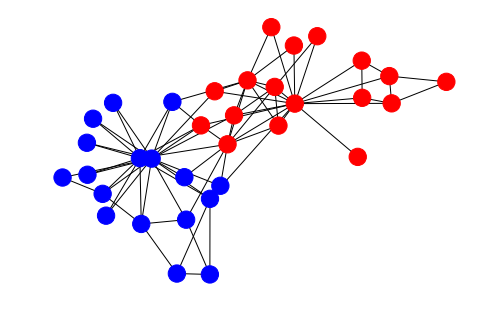

In [211]:
zkc = nw.karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat,axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

color_dict = {'Mr. Hi':'r', 'Officer':'b'}#将这个图画出来
color_label = [color_dict[j] for j in [zkc.node[i]['club'] for i in zkc.node()]] 
nw.draw(zkc,pos=nw.spring_layout(zkc), node_color=color_label)

In [210]:
A_hat

matrix([[1., 1., 1., ..., 1., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.]])

In [90]:
D_hat

matrix([[17.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 10.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 11., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., 13.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 18.]])

In [225]:
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(),4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

In [92]:
W_1.shape

(34, 4)

In [93]:
W_2.shape

(4, 2)

In [228]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

#这里是分类任务，每个节点是唯一的一个id，这里用one-hot来表示，即可以用单位矩阵I来表示
#堆叠两层GCN
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

In [223]:
H_2 #我理解的输出的这两个维度的特征就是x,y坐标

matrix([[0.        , 0.51428376],
        [0.11754739, 0.13806445],
        [0.29036094, 0.        ],
        [0.18068085, 0.0883161 ],
        [0.        , 0.65561044],
        [0.        , 0.46394422],
        [0.        , 0.70742085],
        [0.10232311, 0.04853214],
        [0.18532697, 0.        ],
        [0.30871347, 0.        ],
        [0.        , 0.77675316],
        [0.        , 1.91223671],
        [0.22462174, 0.19358754],
        [0.16106844, 0.00244234],
        [0.27146766, 0.06106055],
        [0.27157057, 0.08263667],
        [0.        , 0.53227014],
        [0.        , 0.28853624],
        [0.27136021, 0.03853084],
        [0.05644671, 0.12376972],
        [0.2761763 , 0.        ],
        [0.        , 0.26450563],
        [0.27162382, 0.09380071],
        [0.18880731, 0.01048758],
        [0.00615011, 0.20197557],
        [0.        , 0.24177845],
        [0.58404372, 0.        ],
        [0.22053223, 0.        ],
        [0.18386097, 0.        ],
        [0.440

In [140]:
#提取特征表征
feature_representations = {node: np.array(H_2)[node] for node in zkc.nodes()}

In [141]:
feature_representations

{0: array([0.27967821, 0.14610072]),
 1: array([0.2993802 , 0.25666996]),
 2: array([0.        , 0.06957627]),
 3: array([0.34879004, 0.10120102]),
 4: array([0.08040932, 0.11372091]),
 5: array([0.15410291, 0.33368401]),
 6: array([0.21583775, 0.33933011]),
 7: array([0.37410171, 0.13910194]),
 8: array([0.09026017, 0.15895161]),
 9: array([0.        , 0.02050927]),
 10: array([0.12773839, 0.11887448]),
 11: array([1.21058216, 0.        ]),
 12: array([0.3751008 , 0.12625039]),
 13: array([0.23516984, 0.12639101]),
 14: array([0.        , 0.18170636]),
 15: array([0.10477409, 0.22873449]),
 16: array([0.19051061, 0.48237111]),
 17: array([0.45255984, 0.57159161]),
 18: array([0.        , 0.03127912]),
 19: array([0.0398646 , 0.20710557]),
 20: array([0.        , 0.03551798]),
 21: array([0.27442105, 0.32631436]),
 22: array([0.        , 0.01907219]),
 23: array([0.        , 0.06650368]),
 24: array([0., 0.]),
 25: array([0.        , 0.03656314]),
 26: array([0.        , 0.16506687]),


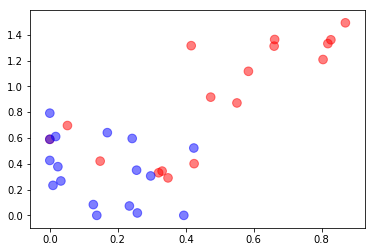

In [253]:
import matplotlib.pyplot as plt
import numpy as np

X = [i[0] for i in np.array(H_2)]
Y = [i[1] for i in np.array(H_2)]
plt.scatter(X, Y, s=75, c=color_label, alpha=.5)

# plt.xlim(-1.5, 1.5)

# plt.ylim(-1.5, 1.5)

plt.show()

# 其他参考学习素材

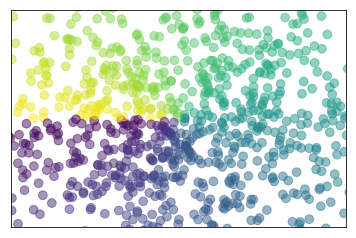

In [237]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()

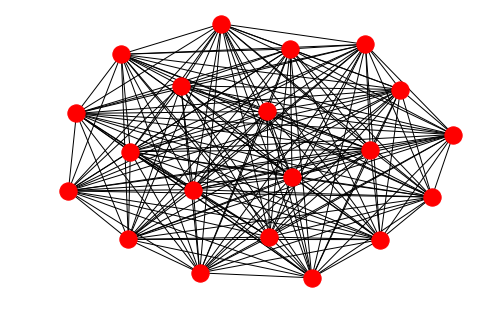

In [130]:
G=nw.complete_graph(20)
#nw.draw(G)
nw.draw(G,pos=nw.spring_layout(G))
#H


/home/SENSETIME/caoguoliang/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


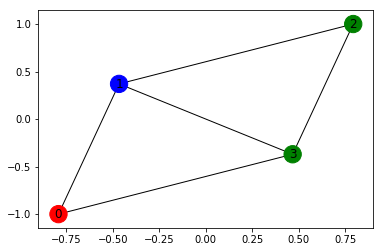

In [188]:
A = np.matrix([[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0]])
GG = nw.from_numpy_matrix(A)
nw.draw_networkx(GG,pos=nw.spring_layout(GG),node_color=['r','b','g','g'])

In [ ]:
#这里用GCN训练网络并测试的方法是，先使用如上面的这个空手道俱乐部社交网络的图，然后我们将他们的gt作为test用的gt；然后在训练的时候，只给
#其中几个节点的gt label，其他节点不给label，然后就去训练网络。最后将训练好的模型再过一次那些没有label的点，然后将得到的分类结果跟原来
#的gt进行比较，来计算精确度

In [258]:
xxx = torch.randn(3,4,5,5)

In [263]:
torch.max(xxx.view(3,4,25),2)

torch.return_types.max(
values=tensor([[1.0652, 2.4414, 2.1116, 2.3766],
        [2.4512, 1.9897, 1.6559, 2.0605],
        [2.0489, 1.8928, 2.0251, 1.2362]]),
indices=tensor([[ 6, 22,  8, 16],
        [14, 18, 11, 15],
        [ 8, 11, 11, 19]]))

In [265]:
value,index = torch.max(xxx.view(3,4,25),2)

In [266]:
index_y = index.div(5)
index_x = index - index_y.mul(5)
index_y

tensor([[1, 4, 1, 3],
        [2, 3, 2, 3],
        [1, 2, 2, 3]])

In [267]:
index_y = index_y.type(torch.cuda.FloatTensor).view(3,4,1)
index_y

tensor([[[1.],
         [4.],
         [1.],
         [3.]],

        [[2.],
         [3.],
         [2.],
         [3.]],

        [[1.],
         [2.],
         [2.],
         [3.]]], device='cuda:0')

In [268]:
(index_y - (5/2))/(5/2)

tensor([[[-0.6000],
         [ 0.6000],
         [-0.6000],
         [ 0.2000]],

        [[-0.2000],
         [ 0.2000],
         [-0.2000],
         [ 0.2000]],

        [[-0.6000],
         [-0.2000],
         [-0.2000],
         [ 0.2000]]], device='cuda:0')

In [269]:
off_diag = np.ones([14, 14]) - np.eye(14)

In [270]:
off_diag

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

In [272]:
def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)), dtype=np.int32)
    return labels_onehot

In [273]:
rel_rec = np.array(encode_onehot(np.where(off_diag)[1]), dtype=np.float32)

In [274]:
rel_rec

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [275]:
rel_send = np.array(encode_onehot(np.where(off_diag)[0]), dtype=np.float32)

In [276]:
rel_send

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [277]:
rel_send.shape

(182, 14)

In [278]:
rel_rec.shape

(182, 14)

In [279]:
off_diag.shape

(14, 14)

In [281]:
np.where(off_diag)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  0

In [300]:
encode_onehot(np.where(off_diag)[0])[0:14]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [297]:
encode_onehot(np.where(off_diag)[0]).shape

(182, 14)

In [298]:
182/14

13.0

In [306]:
torch.cat([torch.Tensor(rel_send), torch.Tensor(rel_rec)], dim=1).shape

torch.Size([182, 28])

In [310]:
import torch.nn.functional as F
def my_softmax(input, axis=1):
    trans_input = input.transpose(axis, 0).contiguous()
    soft_max_1d = F.softmax(trans_input,dim=0)
    return soft_max_1d.transpose(axis, 0)

In [316]:
my_softmax(torch.Tensor(rel_send[:,0:2]),-1)

tensor([[0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.2689, 0.7311],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5

In [314]:
v = torch.Tensor(rel_send[:,0:2])
v.transpose(1,0).contiguous()

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0

In [317]:
pre_msg = torch.randn(1,1,182,6)

In [321]:
from torch.autograd import Variable
import torch.nn as nn
all_msgs = Variable(torch.zeros(pre_msg.size(0), pre_msg.size(1),512)) 

In [320]:
all_msgs.shape

torch.Size([1, 1, 512])

In [322]:
msg_fc1 = nn.ModuleList( [nn.Linear(2 * 3, 512) for _ in range(2)]) 
msg_fc2 = nn.ModuleList( [nn.Linear(512, 512) for _ in range(2)]) 

In [325]:
msg = F.relu(msg_fc1[0](pre_msg))

In [328]:
msg.shape

torch.Size([1, 1, 182, 512])

In [331]:
msg = F.relu(msg_fc2[0](msg))
msg.shape

torch.Size([1, 1, 182, 512])

In [338]:
msg = msg * sd[:, :, 0]

IndexError: too many indices for tensor of dimension 2

In [334]:
sd = my_softmax(torch.Tensor(rel_send[:,0:2]),-1)

In [339]:
sd.shape

torch.Size([182, 2])